In [1]:
%load_ext autoreload
%autoreload 2
    
from manager import * 
import rosnode
import time
from env_utils.algo_constants import *


In [2]:
if '/manager' in rosnode.get_node_names():
    # print("Manager is running")
    rosnode.kill_nodes(['manager'])
    time.sleep(1)

m = Manager(skip_checks=False, 
            debug_flag=True) 
            # fake_hardware_flags=[FAKE_ARM, FAKE_PXRF])
# m.fake_pxrf_values = [0.13, 0.2, 0.0, 0.5, 0.6, 0.05]
# m.fake_pxrf_values = [0.4, 0.2, 0.3, 0, 0.02, 0.5, 0.32, 0.0, 0.6, 0.0, 0.1, 0.0]

[INFO] [1727381336.733964]:  < Status: Initialization > 
[INFO] [1727381336.766896]:  < Status: Waiting for GPS init > 
[INFO] [1727381336.767881]: Waiting for GPS Initialization...
[INFO] [1727381337.769217]: GPS Full Navigation Achieved!
[INFO] [1727381337.771728]:  < Status: Ready > 
[INFO] [1727381337.786269]:  | Algorithm Set to ADAPTIVE with number of samples = 16
[INFO] [1727381337.787012]:  ----------- READY ----------- 


[WARN] [1727381337.785233]: Started PXRF
[WARN] [1727381348.184975]: | Reset 


[INFO] [1727381348.244300]: ----------------
 Boundary Points:
 [(40.472192252948844, -79.96618878366543), (40.472287089637994, -79.96611691825605), (40.47232471460376, -79.96621370229717), (40.47222688966315, -79.96628646854616), (40.472192252948844, -79.96618878366543)]
----------------
[INFO] [1727381348.995457]: Width: 15 m | 60 cells
[INFO] [1727381348.997088]: Height: 15 m | : 60 cells
[INFO] [1727381348.998259]: Start: (4.556799156824127, 5.8485942697152495) m | (17, 22) cells
[INFO] [1727381348.999395]: Boundary Offset (MAP): [[8.325877341558225, 0.0], [14.294671454816125, 10.598438502289355], [6.0412823701044545, 14.678791693411767], [0.0, 3.747763028368354], [8.325877341558225, 0.0]]
[INFO] [1727381349.000454]: Boundary Offset (GRID): [(32, 0), (56, 41), (23, 57), (0, 13), (32, 0)]
len(x1): 60, len(x2): 60, len(x1x2): (3600, 2)
[INFO] [1727381349.023240]: lengths of x1 | x2 | x1x2: 60 | 60 | (3600, 2) 
[INFO] [1727381349.034402]:  < Status: Received search area > 
[INFO] [172

[INFO] [1727384044.732788]: ----------- Manager Loop: adaptive -----------
[INFO] [1727384044.733923]:  < Status: Running search algo > 
[INFO] [1727384044.811826]:  | Updating GPR with value=0.06572749465703964 at (GPS|Map|Grid): (40.47225386177974, -79.96615483888145) | (11.126268539926969, 6.87256386410445) | (43, 26) 


/home/patrick/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 5.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


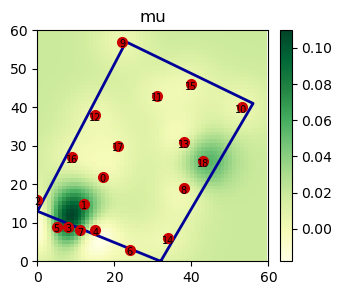

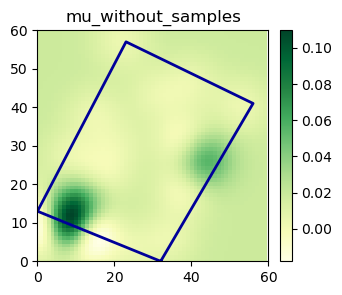

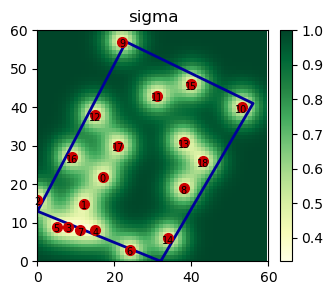

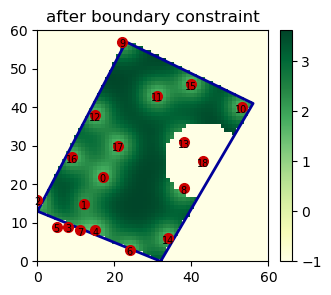

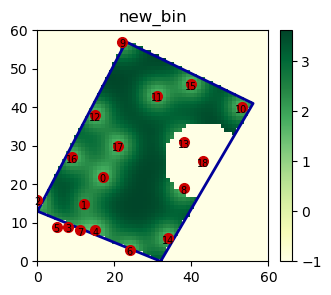

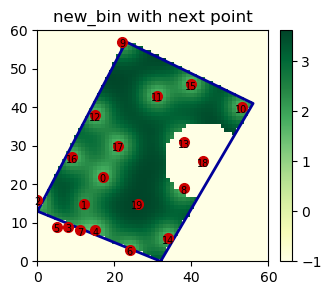

---------
[INFO] [1727384045.631302]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.472227336831814, -79.966208309954) | (6.625, 3.875) | [26, 15] 
[INFO] [1727384045.714905]:  < Status: Received next scan loc > 
[INFO] [1727384045.715892]: ----------- Manager Loop END -----------
[INFO] [1727384045.717568]: ----------- Manager Loop: adaptive -----------
[INFO] [1727384045.718613]:  < Status: Navigating to scan loc > 
[INFO] [1727384045.726261]:  | Goal Sent to movebase...
[INFO] [1727384083.777611]:  | Movebase Goal Reached, Backing up...
[INFO] [1727384085.782206]:  < Status: Arrived at scan loc > 
[INFO] [1727384085.783497]: ----------- Manager Loop END -----------
GPR Kernel: RBF(length_scale=5)
Arrived at scan loc


In [84]:
if (m.status != SCANNING and
    m.status != ERROR):
    while ( m.status == ARRIVED_AT_SCAN_LOC or
            m.status == ARM_RETURNED):
            m.run_once()
    m.run_once()
    print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')

print(m.status)

In [74]:
for i in range(0,6):
    print(f" ----- PATH LENGTH: {m.adaptiveROS.path_len} -----")
    
    while (m.status != SCANNING and
        m.status != ERROR):
        while ( m.status == ARRIVED_AT_SCAN_LOC or
                m.status == ARM_RETURNED):
                m.run_once()
        m.run_once()
        print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')
    
    while (m.status == SCANNING):
        rospy.sleep(2)
        
    print(m.status)

[INFO] [1727383748.868430]: ----------- Manager Loop: adaptive -----------
[INFO] [1727383748.902596]:  < Status: Arm returning > 
[INFO] [1727383758.427831]:  < Status: Arm returned > 
[INFO] [1727383758.428912]: ----------- Manager Loop END -----------
GPR Kernel: RBF(length_scale=5)
Arm returned


[INFO] [1727382333.392828]: ----------- Manager Loop: adaptive -----------
[INFO] [1727382333.393877]:  < Status: Arm returning > 
[INFO] [1727382342.942528]:  < Status: Arm returned > 
[INFO] [1727382342.944808]: ----------- Manager Loop END -----------
GPR Kernel: RBF(length_scale=5)
Arm returned
[INFO] [1727382342.946446]: ----------- Manager Loop: adaptive -----------
[INFO] [1727382342.947419]:  < Status: Running search algo > 
[INFO] [1727382343.011592]:  | Updating GPR with value=0.0 at (GPS|Map|Grid): (40.47221428652579, -79.96625045173457) | (3.068052453105338, 2.383324509486556) | (11, 8) 


/home/patrick/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 5.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


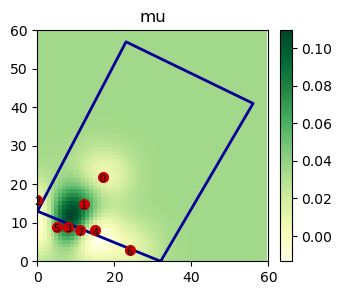

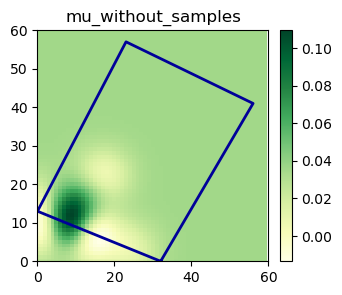

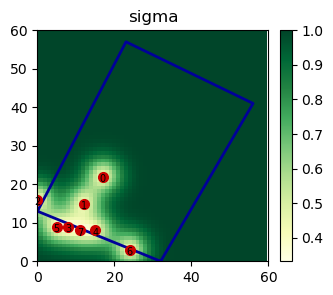

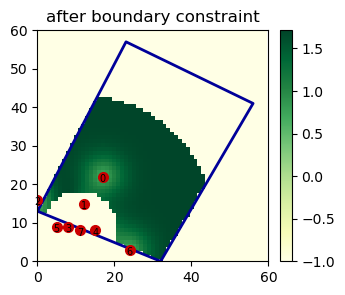

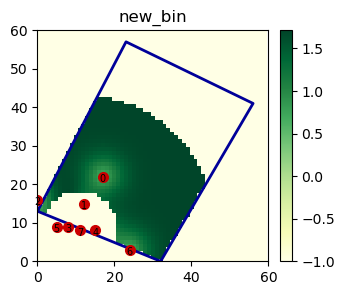

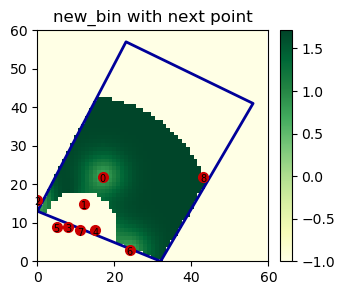

---------
[INFO] [1727382343.758287]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.47224265172586, -79.96615793998347) | (10.875, 5.625) | [43, 22] 
[INFO] [1727382343.809079]:  < Status: Received next scan loc > 
[INFO] [1727382343.810081]: ----------- Manager Loop END -----------
[INFO] [1727382343.811635]: ----------- Manager Loop: adaptive -----------
[INFO] [1727382343.812531]:  < Status: Navigating to scan loc > 
[INFO] [1727382343.819987]:  | Goal Sent to movebase...
[INFO] [1727382393.021200]:  | Movebase Goal Reached, Backing up...
[INFO] [1727382395.025706]:  < Status: Arrived at scan loc > 
[INFO] [1727382395.027117]: ----------- Manager Loop END -----------
GPR Kernel: RBF(length_scale=5)
Arrived at scan loc
[INFO] [1727382395.028743]: ----------- Manager Loop: adaptive -----------
[INFO] [1727382395.029841]:  < Status: Arm lowering > 
[INFO] [1727382409.101741]:  < Status: Arm lowered > 
[INFO] [1727382409.103086]: ----------- Manager Loop END -----------
[IN

In [32]:
for i in range(0,6):
    if (m.status != SCANNING and
        m.status != ERROR):
        while ( m.status == ARRIVED_AT_SCAN_LOC or
                m.status == ARM_RETURNED):
                m.run_once()
        m.run_once()
        print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')
    
    print(m.status)

In [ ]:
for i in range(0,4):
    if (m.status != SCANNING and
        m.status != ERROR):
        while ( m.status == ARRIVED_AT_SCAN_LOC or
                m.status == ARM_RETURNED):
                m.run_once()
        m.run_once()

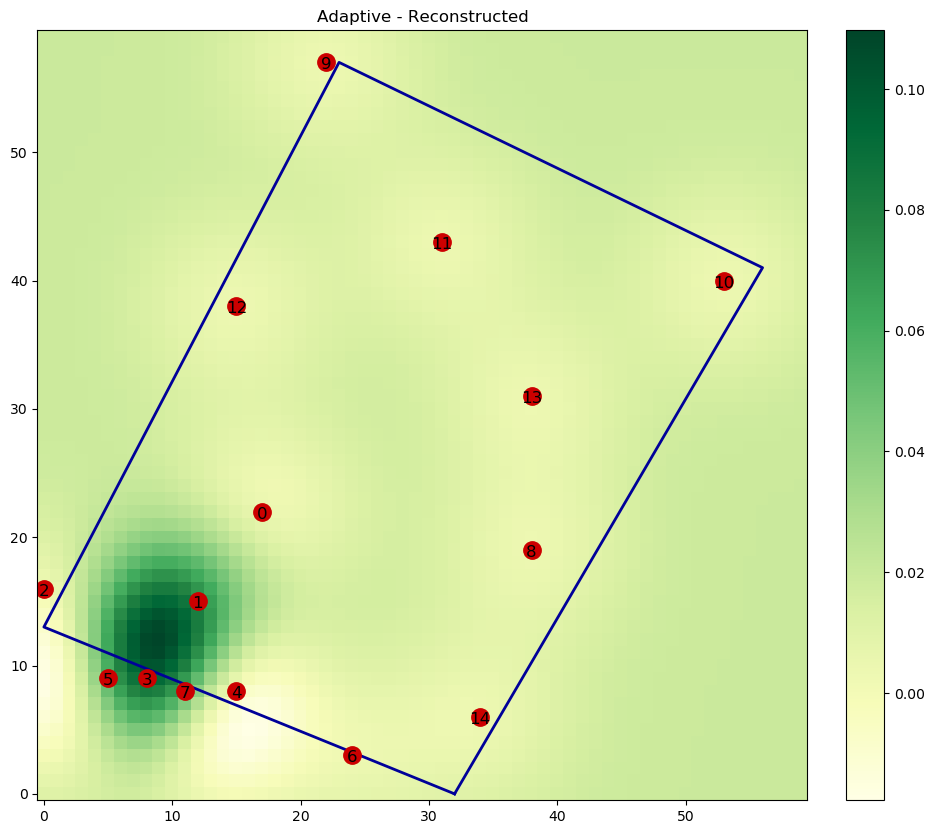

[INFO] [1727383606.304002]: Sampled at [34, 6] with value = 0.0
[INFO] [1727383606.305311]: Adaptive Norm Range: 0.2014


In [70]:
m.show()

In [ ]:
sampled = [[m.adaptiveROS.sampled[0][1], m.adaptiveROS.sampled[0][0]]]
# sampled = m.adaptiveROS.sampled
print(sampled)
m.adaptiveROS.gp.fit(sampled, 
                     m.adaptiveROS.sampled_val) #todo: Should we re-init self.gp?

nextScanLoc = m.adaptiveROS.predict(True)

In [ ]:
nav_goal_map = m.conversion.grid2map(nextScanLoc[0], nextScanLoc[1])
nav_goal_gps = m.conversion.map2gps(nav_goal_map[0], nav_goal_map[1])
        
m.send_location_to_GUI(nav_goal_gps[0], nav_goal_gps[1])

In [ ]:
import pickle


In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
with open('nrec_sep_13_adaptiveROS.pkl', 'wb') as file:
    pickle.dump(m.adaptiveROS, file)

In [ ]:
with open('nrec_sep_13_transformer_variables.pkl', 'wb') as file:
    pickle.dump(member_vars, file)

In [ ]:
member_vars.pop('adaptiveROS')

In [ ]:
member_vars['tran

In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
m.show()